<a href="https://colab.research.google.com/github/iamdurgesh/ML-Projects-By-Topic/blob/primary/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
from sklearn.datasets import fetch_openml

In [6]:
mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y = mnist.data, mnist.target

In [10]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
X.shape

(70000, 784)

In [12]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [13]:
y.shape

(70000,)

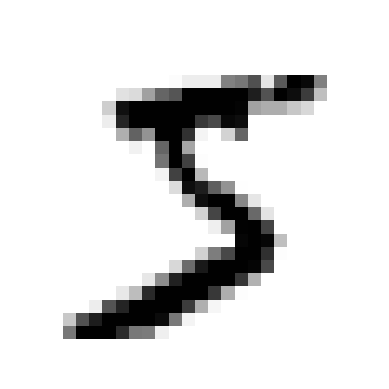

In [14]:
# The dataset has 784 features as each feature represents one pixel intensity and img size is 28*28
import matplotlib.pyplot as plt

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap = "binary")
  plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [15]:
y[123]

'7'

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
# Training a Binary Classifier
#creating target vector for the clssification task
y_train_5 = (y_train == '5') # true for all 5s only
y_test_5 = (y_test == '5')

In [18]:
# Training on a SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

In [20]:
# Evaluating Performance Measures
#1. Using Cross-validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [21]:
# Using a dummy classifier from most frequet class as a negative class(non 5)
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))  # should print false

False


In [22]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#The result shows that 90% of the images are non 5s, so accuracy is not a good parameter to measure performance!!

array([0.90965, 0.90965, 0.90965])

In [23]:
# Using Confusion Matrix for better performance measure
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf ,X_train, y_train_5, cv=3)

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [25]:
y_train_perfect_predictions = y_train_5     # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [26]:
# Calculating Precision and Recall Score (pg:110)
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)      # == 3530/(687+3530)

0.8370879772350012

In [27]:
# computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [28]:
recall_score(y_train_5, y_train_pred)     #== 3530/(1891+3530)

0.6511713705958311

In [29]:
# computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [30]:
# Calculating F1-Score (harmonic mean of precision and recall) (pg111)
from sklearn.metrics import f1_score    # only use when there is not much difference b/w the ratio of precision and recall
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [31]:
# The Precision/Recall Trade-off
# the SGDClassifier decides based on the score from decision function, assigns to positive class if the score is greater than threshold
# calling Sklearn's decision function to alter the threshold
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [32]:
threshold = 0     # SGD uses a threshold = 0

In [33]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [34]:
threshold = 3000

In [35]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [36]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [37]:
# Creating a prediction recall curve
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)


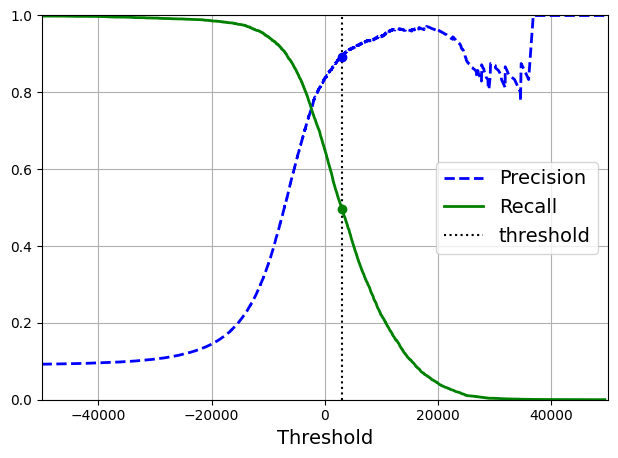

In [38]:
plt.plot(thresholds, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

#adding legends, axis and labels
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precision[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")
plt.show()

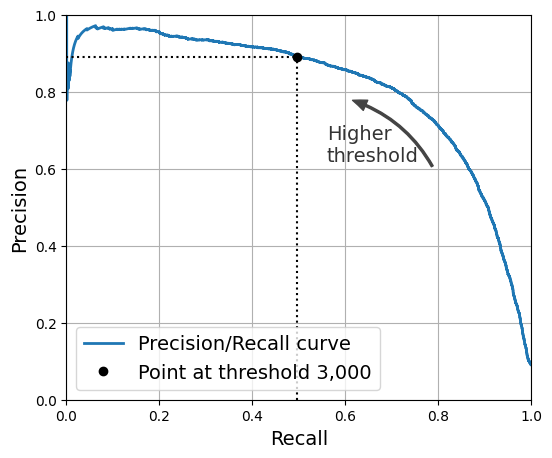

In [39]:
# Plotting precision against Recall
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))
plt.plot(recalls, precision, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precision[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precision[idx], precision[idx]], "k:")
plt.plot([recalls[idx]], [precision[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [40]:
#Lowest threshold for 90% precision, using numpy array
idx_for_90_precision = (precision >= 0.90).argmax()

In [41]:
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [42]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [43]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [44]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

In [45]:
# ROC Curve (plotting Sensitivity(recall)vs 1-specificity(TNR))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

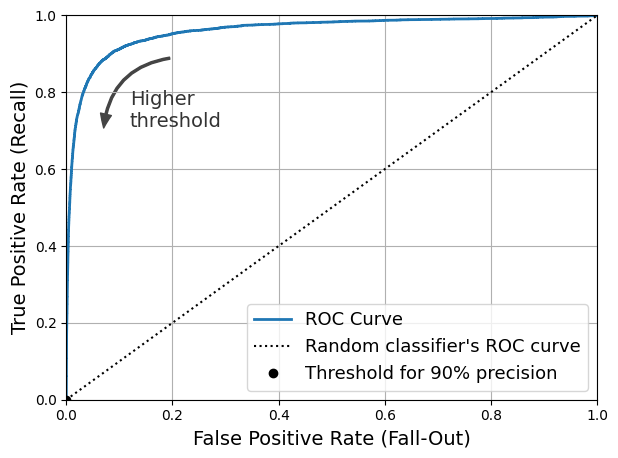

In [46]:
idx_for_threshold_at_90 = (threshold <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 =  tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]
plt.plot(fpr, tpr, linewidth=2, label="ROC Curve")
plt.plot([0,1], [0,1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
#Adding legend, grid, arrow and text
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [47]:
#Area under the Curve (ROC AUC= AREA UNDER THE CURVE, AUC = 1, perfect classiffier)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [48]:
# RandomForestClassifier, and comparing PR curve and F1 score to SGDClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)


In [49]:
# RandomforestClassifier has no decision_function(), instead predict_proba()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")


In [50]:
y_probas_forest[:5]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.99, 0.01]])

In [51]:
y_scores_forest = y_probas_forest[:,1]
precision_forest, recall_forest, threshold_forest = precision_recall_curve(y_train_5, y_scores_forest)

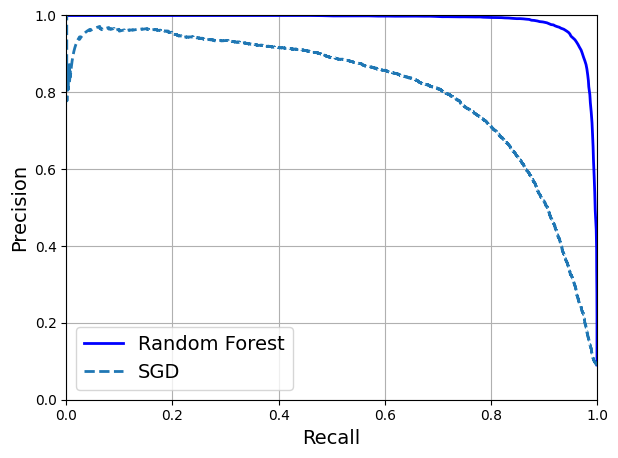

In [52]:
# Plotting the PR-curve
plt.plot(recall_forest, precision_forest, "b-", linewidth=2, label="Random Forest")
plt.plot(recalls, precision, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

In [53]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba>=50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [54]:
roc_auc_score(y_train_5, y_scores_forest)


0.9983436731328145

In [55]:
# MultiClass Classification
# Training first 2000 images using SVC
from sklearn.svm import SVC
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])   #y_train, not y_train_5

SVC(random_state=42)

In [56]:
# Making prediction
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [57]:
# Calling decision_function
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [58]:
class_id = some_digit_scores.argmax()
class_id

5

In [59]:
# Class id and indexes are not generally the same, so alwways try to cross-check
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [60]:
svm_clf.classes_[class_id]

'5'

In [61]:
# Creating one-versus-one or oneversus-rest classifier
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [62]:
# Prediction to check no of trained classifiers
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [63]:
len(ovr_clf.estimators_)

10

In [64]:
# Training an SGDClassifier on a multiclass dataset
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [65]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [66]:
# using cross_val_score function
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [67]:
# Scaling the inputs for increasing the accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
# cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

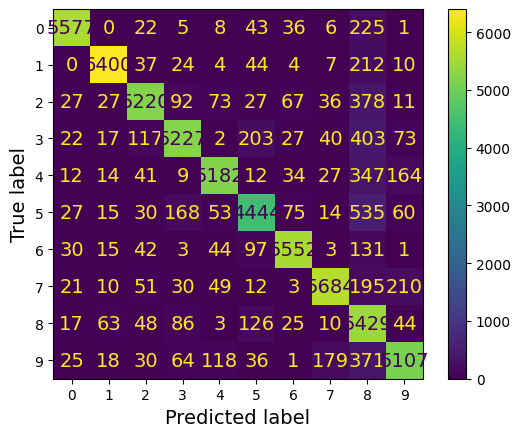

In [68]:
# Error Analysis
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

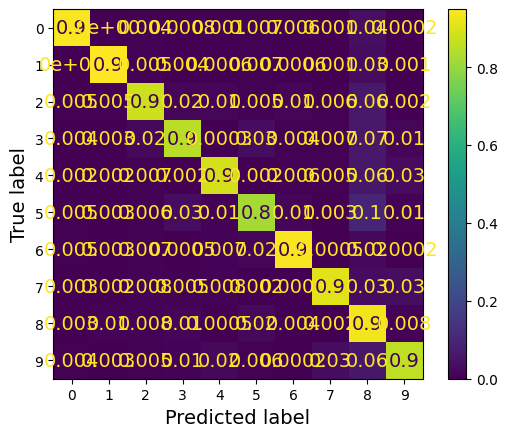

In [69]:
#Consfusion Matrix with % format and normalisations
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0")
plt.show()

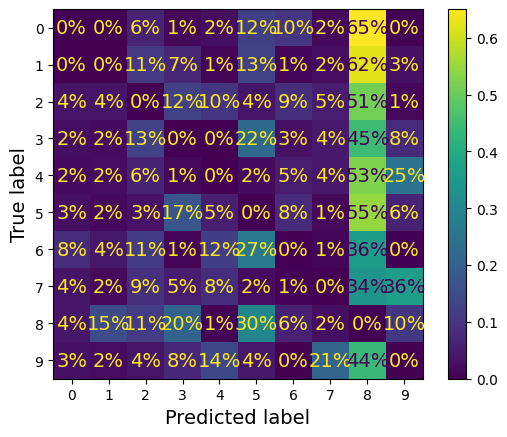

In [70]:
# Putting 0 weight on the correct prediction
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

In [71]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

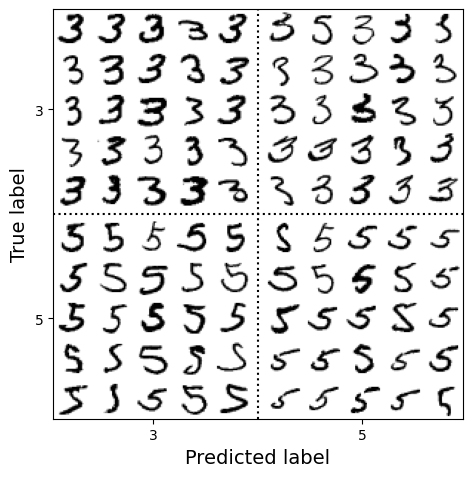

In [72]:
# Code to plot graph
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

In [73]:
#Multilabel Classiffication
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>='7')
y_train_odd = (y_train.astype('int8')%2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [74]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [75]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.976410265560605

In [76]:
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [77]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [79]:
#Multioutput Classification
np.random.seed(42)        # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
# X_test_mod = X_test + noise

In [80]:
y_train_mod = X_train
y_test_mode = X_test

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()